<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/K_Means_Clustering_(Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Repo: https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
Sumber dataset (UCI): https://archive.ics.uci.edu/dataset/236/seeds
Ukuran data: (210, 8)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1



Tabel 7.1. Nilai kosong per kolom


,missing
area,0
perimeter,0
compactness,0
kernel_length,0
kernel_width,0
asymmetry_coeff,0
groove_length,0
variety,0



Tabel 7.2. Statistik deskriptif fitur


,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
kernel_length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
kernel_width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry_coeff,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
groove_length,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
variety,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000



Tabel 7.3. Distribusi varietas (label asli; hanya untuk interpretasi)


,count
variety,
1,70
2,70
3,70



Tabel 7.4. Contoh sebelum vs sesudah standardisasi (5 baris, 2 fitur)


,area_raw,area_scaled,perimeter_raw,perimeter_scaled
0,15.26,0.142098,14.84,0.215462
1,14.88,0.011188,14.57,0.008224
2,14.29,-0.192067,14.09,-0.360201
3,13.84,-0.347091,13.94,-0.475333
4,16.14,0.445257,14.99,0.330595


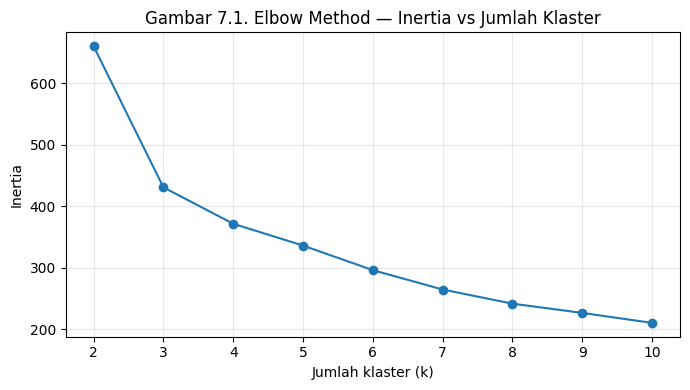

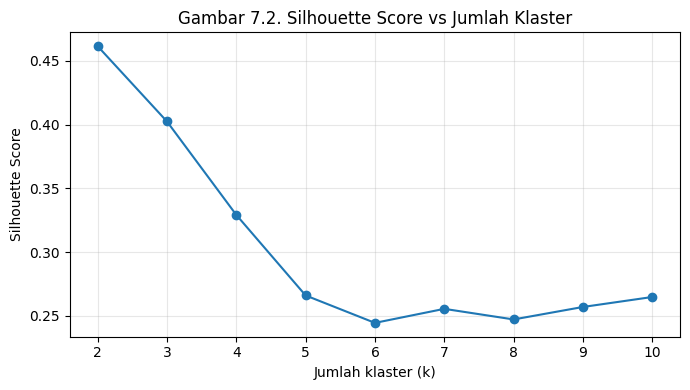


Tabel 7.5. Ringkasan Inertia dan Silhouette untuk berbagai k


,k,inertia,silhouette
0,2,659.935777,0.461466
1,3,430.816528,0.402437
2,4,371.653144,0.329197
3,5,336.243099,0.266052
4,6,296.325608,0.244537
5,7,264.905709,0.255544
6,8,241.931588,0.247230
7,9,226.911778,0.257016
8,10,210.713360,0.264835



Silhouette Score (k=3): 0.4024

Tabel 7.6. Centroid klaster (skala asli)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,groove_length
0,18.449559,16.184265,0.884010,6.171397,3.691221,3.644574,6.038074
1,11.832609,13.244928,0.846901,5.235203,2.841913,4.784826,5.110420
2,14.341918,14.287945,0.881655,5.494630,3.249479,2.726825,5.102562


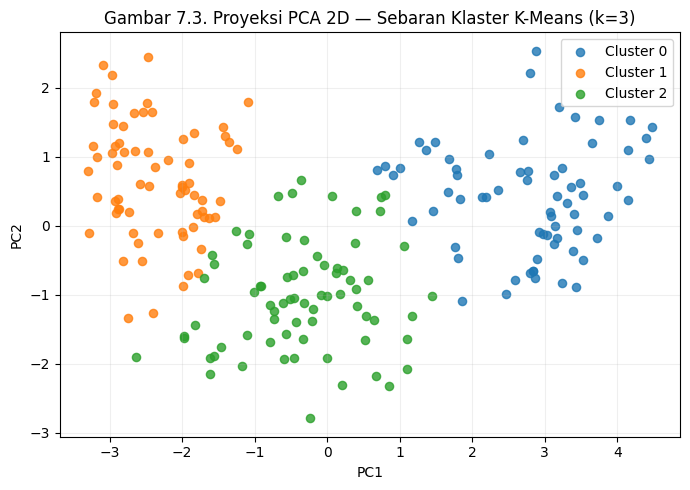


Tabel 7.7. Proporsi variansi PCA


,PC,explained_variance_ratio
0,PC1,0.718743
1,PC2,0.171082



Tabel 7.8. Rata-rata fitur per klaster (profil klaster)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,groove_length
cluster,,,,,,,
0,18.450,16.184,0.884,6.171,3.691,3.645,6.038
1,11.833,13.245,0.847,5.235,2.842,4.785,5.110
2,14.342,14.288,0.882,5.495,3.249,2.727,5.103



Tabel 7.9. Jumlah data per klaster


,count
cluster,
0,68
1,69
2,73



Tabel 7.10. Crosstab varietas vs klaster


cluster,0,1,2
variety,,,
1,2,4,64
2,66,0,4
3,0,65,5



Tabel 7.11. Proporsi klaster pada tiap varietas


cluster,0,1,2
variety,,,
1,0.029,0.057,0.914
2,0.943,0.000,0.057
3,0.000,0.929,0.071


In [2]:
# ==========================================================
# Buku: Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Pertemuan 7 — K-Means Clustering (Unsupervised Learning)
# Repo: https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Dataset: Seeds (UCI) — 3 varietas gandum
# Halaman dataset: https://archive.ics.uci.edu/dataset/236/seeds
# File data mentah: https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
# Lingkungan: Google Colab
# ==========================================================

import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# =========================
# 1) Akuisisi Data (UCI)
# =========================
REPO_URL = "https://github.com/datacentertugaskuliah-coder/PraktikumDS.git"
DATASET_PAGE = "https://archive.ics.uci.edu/dataset/236/seeds"
DATA_FILE_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
DATA_PATH = "seeds_dataset.txt"

print("Repo:", REPO_URL)
print("Sumber dataset (UCI):", DATASET_PAGE)

if not os.path.exists(DATA_PATH):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_PATH)

cols = [
    "area", "perimeter", "compactness",
    "kernel_length", "kernel_width",
    "asymmetry_coeff", "groove_length",
    "variety"  # label asli (1..3), tidak dipakai melatih K-Means
]

df = pd.read_csv(DATA_PATH, sep=r"\s+", header=None, names=cols)
print("Ukuran data:", df.shape)
display(df.head())

# =========================
# 2) Pemeriksaan Data
# =========================
print("\nTabel 7.1. Nilai kosong per kolom")
display(df.isna().sum().to_frame("missing"))

print("\nTabel 7.2. Statistik deskriptif fitur")
display(df.describe().T)

print("\nTabel 7.3. Distribusi varietas (label asli; hanya untuk interpretasi)")
display(df["variety"].value_counts().sort_index().to_frame("count"))

# =========================
# 3) Siapkan Fitur (tanpa label)
# =========================
X = df.drop(columns=["variety"]).copy()

# =========================
# 4) Pra-proses: Standardisasi
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nTabel 7.4. Contoh sebelum vs sesudah standardisasi (5 baris, 2 fitur)")
preview = pd.DataFrame({
    "area_raw": X["area"].head().values,
    "area_scaled": X_scaled[:5, 0],
    "perimeter_raw": X["perimeter"].head().values,
    "perimeter_scaled": X_scaled[:5, 1],
})
display(preview)

# =========================
# 5) Pemilihan k: Elbow (Inertia) + Silhouette
# =========================
Ks = list(range(2, 11))
inertias, sil_scores = [], []

for k in Ks:
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(7, 4))
plt.plot(Ks, inertias, marker="o")
plt.xticks(Ks)
plt.xlabel("Jumlah klaster (k)")
plt.ylabel("Inertia")
plt.title("Gambar 7.1. Elbow Method — Inertia vs Jumlah Klaster")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(Ks, sil_scores, marker="o")
plt.xticks(Ks)
plt.xlabel("Jumlah klaster (k)")
plt.ylabel("Silhouette Score")
plt.title("Gambar 7.2. Silhouette Score vs Jumlah Klaster")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTabel 7.5. Ringkasan Inertia dan Silhouette untuk berbagai k")
display(pd.DataFrame({"k": Ks, "inertia": inertias, "silhouette": sil_scores}))

# =========================
# 6) Pemodelan: K-Means (k = 3 sesuai outline)
# =========================
k_final = 3
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)
df["cluster"] = clusters

sil_final = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score (k={k_final}): {sil_final:.4f}")

# =========================
# 7) Centroid: skala asli agar mudah dimaknai
# =========================
centroids_original = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X.columns
)
print("\nTabel 7.6. Centroid klaster (skala asli)")
display(centroids_original)

# =========================
# 8) Visualisasi Klaster: PCA 2D
# =========================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
for c in range(k_final):
    mask = (df["cluster"].values == c)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=35, alpha=0.8, label=f"Cluster {c}")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Gambar 7.3. Proyeksi PCA 2D — Sebaran Klaster K-Means (k=3)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

print("\nTabel 7.7. Proporsi variansi PCA")
display(pd.DataFrame({"PC": ["PC1", "PC2"], "explained_variance_ratio": pca.explained_variance_ratio_}))

# =========================
# 9) Interpretasi: Profil dan Ukuran Klaster
# =========================
print("\nTabel 7.8. Rata-rata fitur per klaster (profil klaster)")
display(df.groupby("cluster")[X.columns].mean().round(3))

print("\nTabel 7.9. Jumlah data per klaster")
display(df["cluster"].value_counts().sort_index().to_frame("count"))

# =========================
# 10) Evaluasi interpretatif: Varietas asli vs Klaster
#     (label varietas tidak dipakai untuk melatih, hanya untuk membaca keterkaitan)
# =========================
print("\nTabel 7.10. Crosstab varietas vs klaster")
display(pd.crosstab(df["variety"], df["cluster"], rownames=["variety"], colnames=["cluster"]))

print("\nTabel 7.11. Proporsi klaster pada tiap varietas")
ct = pd.crosstab(df["variety"], df["cluster"])
display((ct.T / ct.sum(axis=1)).T.round(3))
